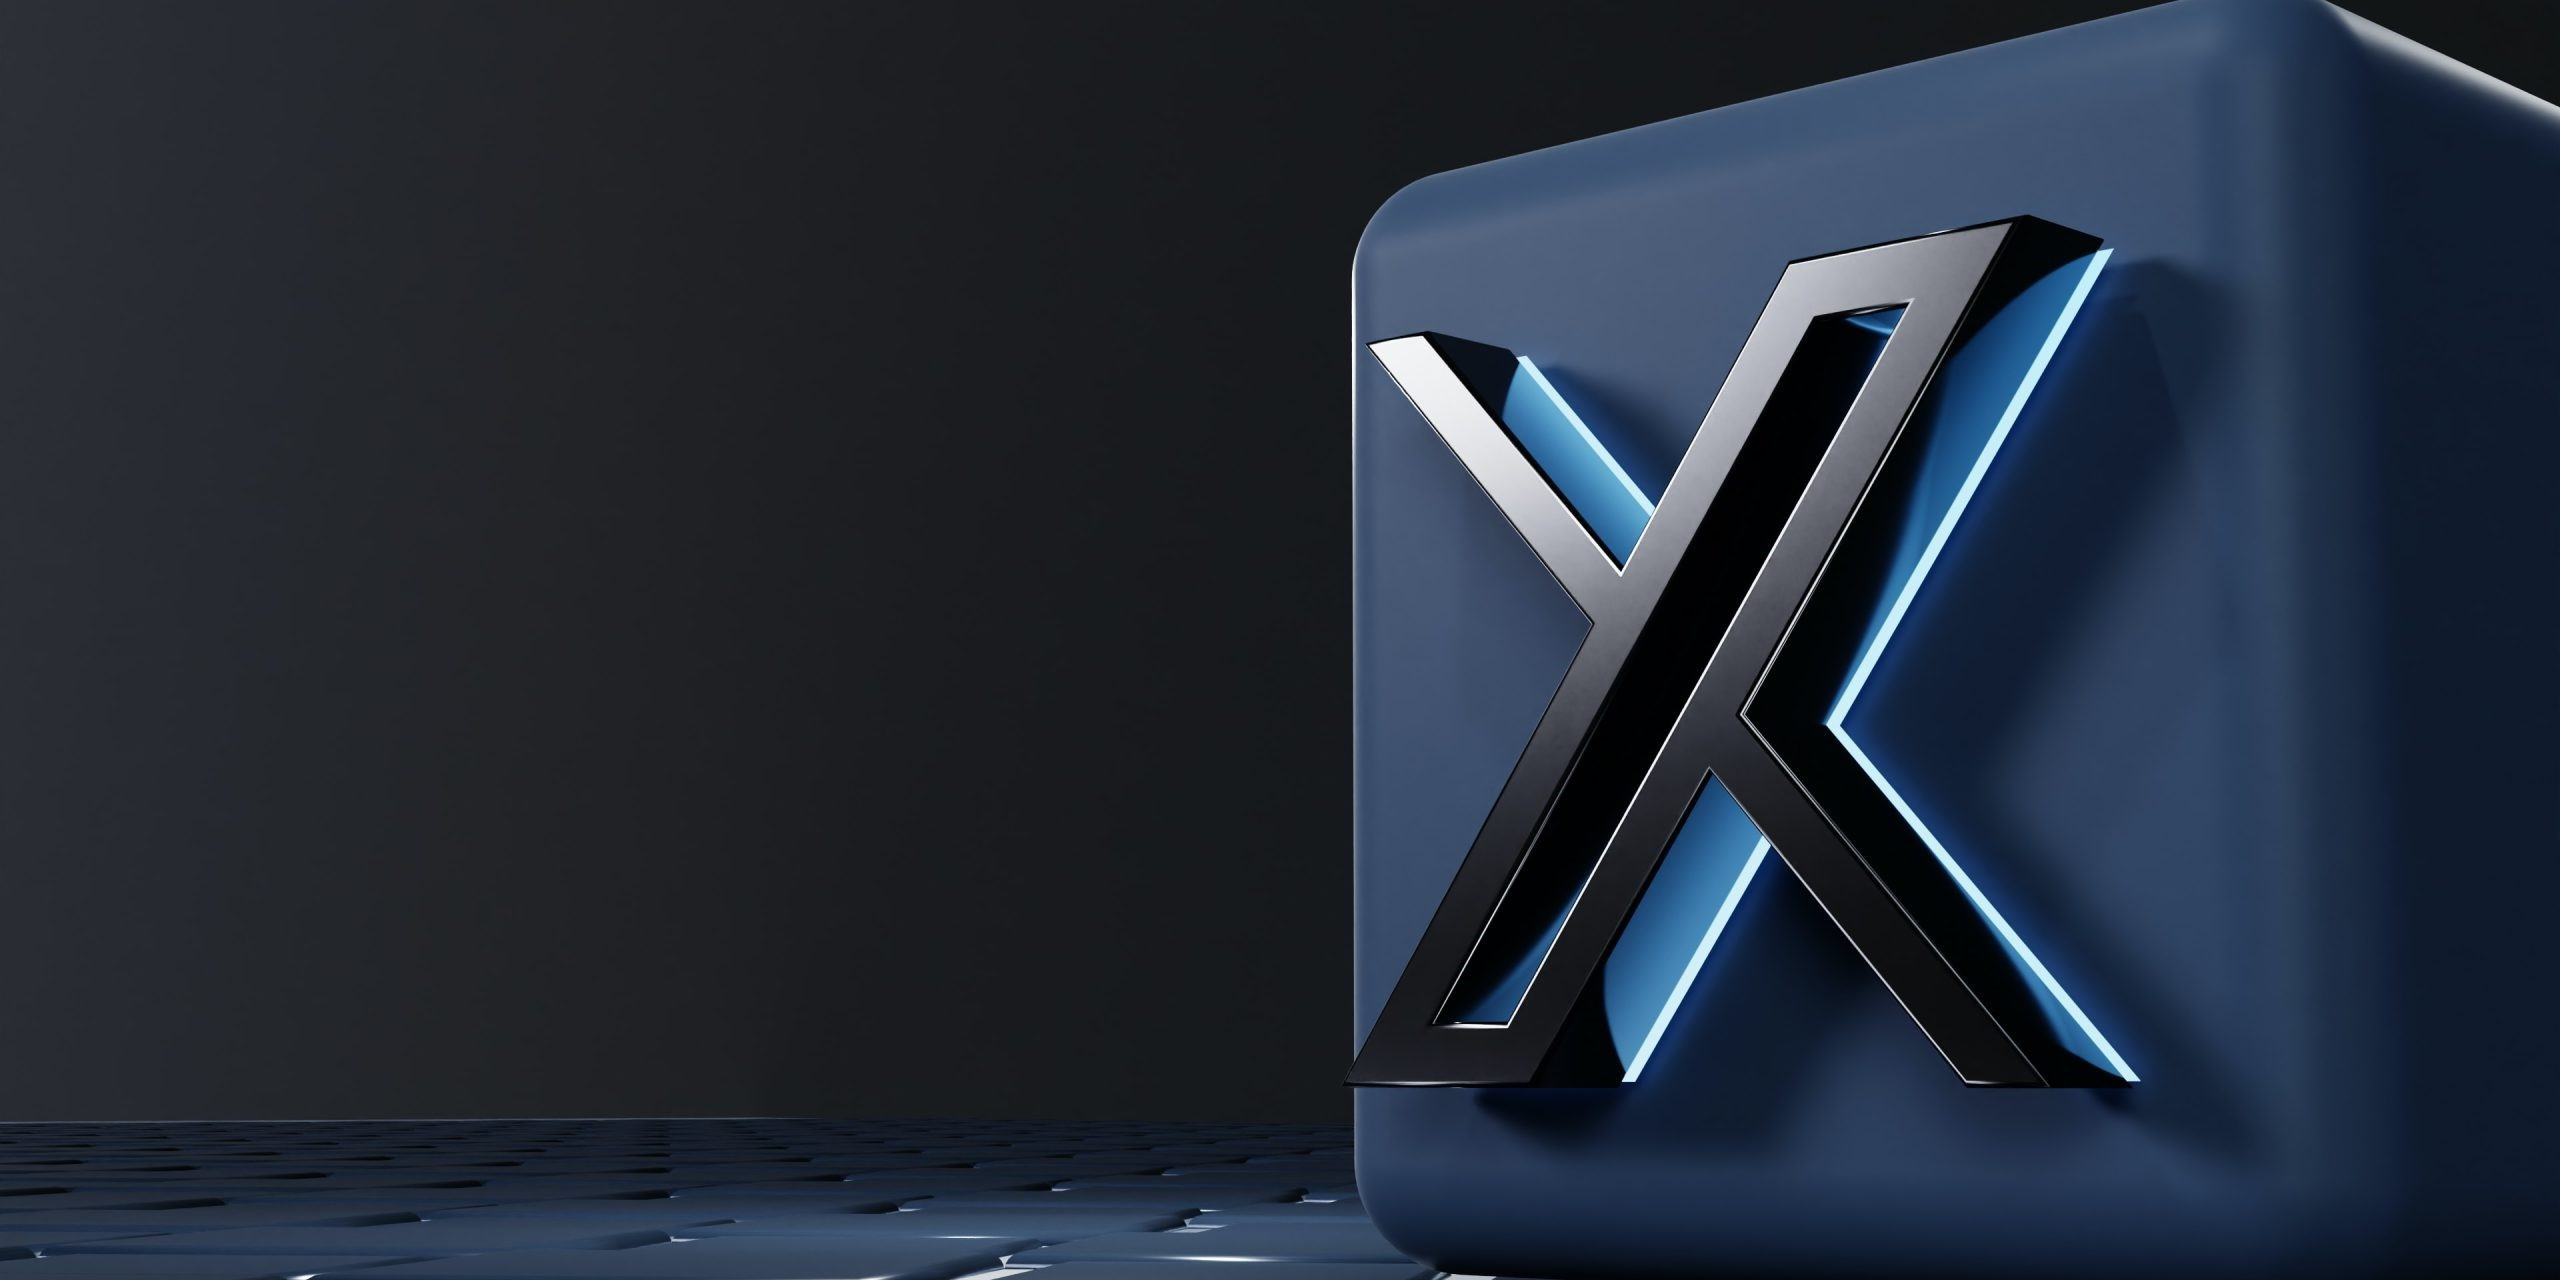

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sa= pd.read_json('tweets.json',lines = True)

In [3]:
sa.head()

,keyword,likes,tweet
0,COVID-19,1,The headline kinda makes it sound like the AP ...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...
2,COVID-19,0,I feel like Diana's line she draws is if his s...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...


In [4]:
sa['keyword'].unique()

array(['COVID-19', 'Vaccine', 'Zoom', 'Bitcoin', 'Dogecoin', 'NFT',
       'Elon Musk', 'Tesla', 'Amazon', 'iPhone 12', 'Remote work',
       'TikTok', 'Instagram', 'Facebook', 'YouTube', 'Netflix',
       'GameStop', 'Super Bowl', 'Olympics', 'Black Lives Matter',
       'Jeffrey Dahmer', 'Johnny Depp', 'Will Smith', 'Weather', 'xvideo',
       'porn', 'nba', 'Macdonald', 'India vs England', 'Ukraine',
       'Queen Elizabeth', 'World Cup'], dtype=object)

In [5]:
sa.shape

(128837, 3)

In [6]:
sa['likes'].unique()

array([   1,    0,   23, ...,  529,  350, 2221], dtype=int64)

In [7]:
sa['word_count']= sa['tweet'].apply(lambda x: len(str(x).split()))

In [8]:
sa.head()

,keyword,likes,tweet,word_count
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12


In [9]:
sa['char_count']= sa['tweet'].str.len()
sa.head()
# Here i want to extract individual words in my tweet column and count the lenght 
# 'len(str(x).split(" ")))' what is the lenght of string x when i spit it into individual words

,keyword,likes,tweet,word_count,char_count
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76


In [10]:
alli= ['what is your name','all the stuff']

In [11]:
df= pd.DataFrame({"stuff": list("alli")})

In [12]:
df.head()

,stuff
0,a
1,l
2,l
3,i


In [13]:
df = pd.DataFrame(alli, columns=['Text'])
df.head()

,Text
0,what is your name
1,all the stuff


In [14]:
df['count']= df['Text'].apply(lambda t: len(str(t).split()))

In [15]:
df.head()

,Text,count
0,what is your name,4
1,all the stuff,3


In [16]:
df['ch_count']= df['Text'].str.len()
df.head()
#This counts each character, as "ABCFG..." including the the " " space. 

,Text,count,ch_count
0,what is your name,4,17
1,all the stuff,3,13


In [17]:
sa.head()

,keyword,likes,tweet,word_count,char_count
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76


In [18]:
# Get the avearage word of sentent
def avg_w(sentence):
    words= sentence.split() #this creats a list called words, that contain the individual words in a sentence
    return (sum(len(word) for word in words)/len(words)) 
#Takes each tweet and slipt it into each individual words, then store them into a list called words
#''(sum(len(word) for word in words)': Add up the sum of each word characters and the divide everything by the total number
# Of words in each tweet

In [19]:
df.head()

,Text,count,ch_count
0,what is your name,4,17
1,all the stuff,3,13


In [20]:
df['avg_text']= df['Text'].apply(lambda x: avg_w(x))
df
#word 0: Average_word= (4+2+4+4)/4 = 3.57 
#word1: Average_word =(3+3+5)/3 = 3.66667

,Text,count,ch_count,avg_text
0,what is your name,4,17,3.500000
1,all the stuff,3,13,3.666667


In [21]:
sa['avg_text']= sa['tweet'].apply(lambda x: avg_w(x))
sa.head()

,keyword,likes,tweet,word_count,char_count,avg_text
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667


## Removing stopwords
Stop words are word that are not required to give meaning to a sentence. This words occur frequently in the language and typically do not carry much meaningful information about the content of the text. However if not removed can lead to biase in modelling as this words apear very frequently. 

***Examples*** is, to, in, and... this words are only needed for human communication, computer dont need them.

### Why doe we remove them?
1. This reduces the dimentinality of the data retrived from texts, because stopwords occurs very frequently, they can lead to a significant increase in dimentionality of data
2. We also remove to get rid of noise from data, when we remove stopwords we keep data to relevant context only.

In [22]:
import nltk
nltk.download('stopwords')# download the latest version of stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [24]:
stop_words = stopwords.words('english')

In [25]:
sa['stop'] = sa['tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
sa.head()                                        #len([x for x in x.split() if x in stop]))

,keyword,likes,tweet,word_count,char_count,avg_text,stop
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000,8
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000,7
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444,8
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789,14
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667,3


In [26]:
text = "This is a sample text."
words = text.split() # split() method breakes string into individual words with white spaces.
print(words)

['This', 'is', 'a', 'sample', 'text.']


In [27]:
sa['hashtag']= sa['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith("#")]))


***startswith meaning:***  is a string method that checks whether a string starts with a specified prefix. It returns True if the string begins with the given prefix; otherwise, it returns False.

***syntax: string.startswith(prefix, start, end)*** 

In [28]:
word= "all students @ college are male"

#applying the 'startwith' method with index
wr= pd.DataFrame({'at': [word.startswith('@', 13)]}, index=[0])
wr

,at
0,True


In [29]:
sa['u_symbol']= sa['tweet'].apply(lambda x:len([x for x in x.split() if x.startswith('@')]))
sa.head()

,keyword,likes,tweet,word_count,char_count,avg_text,stop,hashtag,u_symbol
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000,8,0,0
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000,7,0,0
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444,8,0,0
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789,14,0,0
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667,3,0,0


In [30]:
sa['hashtag'].unique()

array([ 0,  1,  4,  6,  3,  2, 10, 13, 11, 18,  8, 17, 19,  5,  9,  7, 16,
       15, 12, 14, 22, 20, 27, 26, 28, 21, 23, 24, 25, 32, 29],
      dtype=int64)

In [31]:
sa['u_symbol'].unique()

array([0], dtype=int64)

In [32]:
sa['digits']= sa['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [33]:
sa["lower_c"]=sa["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [34]:
sa.head()

,keyword,likes,tweet,word_count,char_count,avg_text,stop,hashtag,u_symbol,digits,lower_c
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000,8,0,0,1,the headline kinda makes it sound like the ap ...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000,7,0,0,0,atlantic city — the city's police athletic lea...
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444,8,0,0,0,i feel like diana's line she draws is if his s...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789,14,0,0,0,covid-19 was the single most fatal communicabl...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667,3,0,0,0,studies: dogs can detect covid-19 with greater...


In [35]:
# removing all special caracters using regular expression regrex
sa["lower_c"]= sa["lower_c"].str.replace('[^\w\s]','')

C:\Users\timay\AppData\Local\Temp\ipykernel_7840\805003848.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sa["lower_c"]= sa["lower_c"].str.replace('[^\w\s]','')


In [36]:
#Removing all stop words
sa["lower_c"]=sa["lower_c"].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop_words))

In [37]:
sa.head()

,keyword,likes,tweet,word_count,char_count,avg_text,stop,hashtag,u_symbol,digits,lower_c
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000,8,0,0,1,headline kinda makes sound like ap acknowledge...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000,7,0,0,0,atlantic city citys police athletic league rec...
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444,8,0,0,0,feel like dianas line draws school experience ...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789,14,0,0,0,covid19 single fatal communicable disease livi...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667,3,0,0,0,studies dogs detect covid19 greater 80 sensiti...


In [38]:
sa['clean']= sa["lower_c"]

In [39]:
sa.head()

,keyword,likes,tweet,word_count,char_count,avg_text,stop,hashtag,u_symbol,digits,lower_c,clean
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000,8,0,0,1,headline kinda makes sound like ap acknowledge...,headline kinda makes sound like ap acknowledge...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000,7,0,0,0,atlantic city citys police athletic league rec...,atlantic city citys police athletic league rec...
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444,8,0,0,0,feel like dianas line draws school experience ...,feel like dianas line draws school experience ...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789,14,0,0,0,covid19 single fatal communicable disease livi...,covid19 single fatal communicable disease livi...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667,3,0,0,0,studies dogs detect covid19 greater 80 sensiti...,studies dogs detect covid19 greater 80 sensiti...


In [40]:
sa.drop(['lower_c'], axis=1, inplace=True)
sa.head()

,keyword,likes,tweet,word_count,char_count,avg_text,stop,hashtag,u_symbol,digits,clean
0,COVID-19,1,The headline kinda makes it sound like the AP ...,25,160,5.400000,8,0,0,1,headline kinda makes sound like ap acknowledge...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...,25,159,5.400000,7,0,0,0,atlantic city citys police athletic league rec...
2,COVID-19,0,I feel like Diana's line she draws is if his s...,18,97,4.444444,8,0,0,0,feel like dianas line draws school experience ...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...,38,222,4.815789,14,0,0,0,covid19 single fatal communicable disease livi...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...,12,76,5.416667,3,0,0,0,studies dogs detect covid19 greater 80 sensiti...
